cnn -----> convolutional neural network
rcnn----. region based convolutional neural network
cnn  -----> image classification
rcnn---->  region based

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import kagglehub
path=kagglehub.model_download("tensorflow/faster-rcnn-resnet-v1/TensorFlow2/faster-rcnn-resnet50-v1-640x640")
print("path to model files: ",path)


100%|██████████| 4.82k/4.82k [00:00<00:00, 2.79MB/s]



  0%|          | 0.00/109M [00:00<?, ?B/s]



  0%|          | 0.00/6.23M [00:00<?, ?B/s]
  1%|          | 1.00M/109M [00:00<00:21, 5.36MB/s]

 16%|█▌        | 1.00M/6.23M [00:00<00:00, 5.50MB/s]
100%|██████████| 6.23M/6.23M [00:00<00:00, 23.2MB/s]

 11%|█         | 12.0M/109M [00:00<00:03, 26.4MB/s]
 17%|█▋        | 18.0M/109M [00:00<00:03, 26.3MB/s]
 25%|██▍       | 27.0M/109M [00:01<00:03, 25.4MB/s]
 31%|███       | 34.0M/109M [00:01<00:02, 26.6MB/s]
 38%|███▊      | 41.0M/109M [00:01<00:02, 33.3MB/s]
 45%|████▌     | 49.0M/109M [00:01<00:01, 35.2MB/s]
 52%|█████▏    | 57.0M/109M [00:01<00:01, 38.2MB/s]
 60%|█████▉    | 65.0M/109M [00:02<00:01, 41.8MB/s]
 67%|██████▋   | 73.0M/109M [00:02<00:01, 35.6MB/s]
 74%|███████▍  | 81.0M/109M [00:02<00:00, 35.5MB/s]
 82%|████████▏ | 89.0M/109M [00:02<00:00, 34.5MB/s]
 89%|████████▉ | 97.0M/109M [00:03<00:00, 37.6MB/s]
100%|██████████| 109M/109M [00:03<00:00, 35.9MB/s]

path to model files:  /root/.cache/kagglehub/models/tensorflow/faster-rcnn-resnet-v1/TensorFlow2/faster-rcnn-resnet50-v1-640x640/1


In [3]:
#loading model into our environment
model=tf.saved_model.load("/root/.cache/kagglehub/models/tensorflow/faster-rcnn-resnet-v1/TensorFlow2/faster-rcnn-resnet50-v1-640x640/1")

In [4]:
#creating a function that will help to read lables from the data

def read_label_map(label_map_path):
    item_id=None    #empty now but later gets updated with id of each item
    item_name=None
    items={}

    with open(label_map_path,'r') as file:
        for line in file:
            line.replace(" ","")
            if line=="item{":
                pass
            elif line=="}":
                pass
            elif "id" in line:
                item_id=int(line.split(":",1)[1].strip())
            elif "display_name" in line:
                item_name=line.split(":",1)[1].replace("'","").replace('"','').strip()

            if item_id is not None and item_name is not None:
                items[item_id]=item_name
                item_id=None
                item_name=None

        return items






In [5]:
class_names=read_label_map(r"/content/coco_classes.pbtxt")

In [6]:
class_names

{1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 13: 'stop sign',
 14: 'parking meter',
 15: 'bench',
 16: 'bird',
 17: 'cat',
 18: 'dog',
 19: 'horse',
 20: 'sheep',
 21: 'cow',
 22: 'elephant',
 23: 'bear',
 24: 'zebra',
 25: 'giraffe',
 27: 'backpack',
 28: 'umbrella',
 31: 'handbag',
 32: 'tie',
 33: 'suitcase',
 34: 'frisbee',
 35: 'skis',
 36: 'snowboard',
 37: 'sports ball',
 38: 'kite',
 39: 'baseball bat',
 40: 'baseball glove',
 41: 'skateboard',
 42: 'surfboard',
 43: 'tennis racket',
 44: 'bottle',
 46: 'wine glass',
 47: 'cup',
 48: 'fork',
 49: 'knife',
 50: 'spoon',
 51: 'bowl',
 52: 'banana',
 53: 'apple',
 54: 'sandwich',
 55: 'orange',
 56: 'broccoli',
 57: 'carrot',
 58: 'hot dog',
 59: 'pizza',
 60: 'donut',
 61: 'cake',
 62: 'chair',
 63: 'couch',
 64: 'potted plant',
 65: 'bed',
 67: 'dining table',
 70: 'toilet',
 72: 'tv',
 73: 'laptop',
 74: 'mo

In [18]:
img=cv2.imread(r"/content/people eating pizza.jpg")

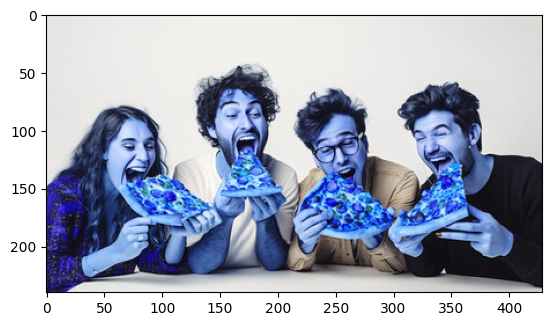

In [19]:
plt.imshow(img)

In [20]:
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
h,w,_=img.shape
input_tensor=np.expand_dims(img,0)
resp=model(input_tensor)

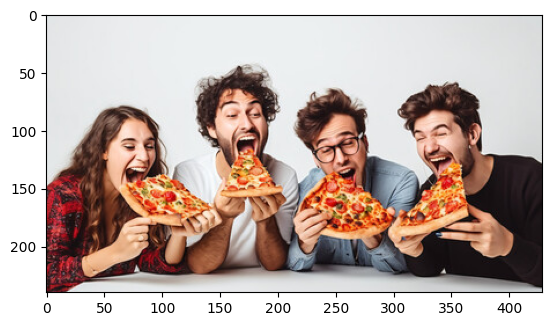

In [21]:
plt.imshow(img)
plt.show()

In [22]:
resp

{'detection_multiclass_scores': <tf.Tensor: shape=(1, 300, 91), dtype=float32, numpy=
 array([[[2.52548349e-03, 3.97968597e-06, 1.05962634e-07, ...,
          2.49321005e-07, 1.73661505e-07, 1.46280328e-07],
         [5.84382983e-03, 3.20273466e-05, 6.05704500e-08, ...,
          7.74208843e-07, 1.11380601e-07, 1.13413407e-07],
         [6.36625569e-03, 9.93007720e-01, 2.51924894e-06, ...,
          1.74148245e-05, 1.91781055e-06, 1.57163902e-06],
         ...,
         [9.93624091e-01, 3.40698425e-05, 5.71641976e-07, ...,
          1.26832119e-05, 1.45930596e-06, 2.10834992e-06],
         [9.86810803e-01, 1.71327993e-05, 2.50079756e-06, ...,
          1.99848982e-05, 1.00917177e-05, 1.05541149e-05],
         [9.86727476e-01, 2.95356385e-05, 4.39379983e-06, ...,
          2.84380803e-05, 5.78872596e-06, 6.67868062e-06]]], dtype=float32)>,
 'detection_classes': <tf.Tensor: shape=(1, 300), dtype=float32, numpy=
 array([[59., 59.,  1., 59.,  1.,  1.,  1., 59., 62.,  1., 59., 59., 59.,
   

In [37]:
for boxes,classes,scores in zip(resp['detection_boxes'].numpy(),resp['detection_classes'].numpy().astype(int),resp['detection_scores'].numpy()):
    for box,cls,score in zip(boxes,classes,scores):
        if score>0.5:
            ymin=int(box[0]*h)
            xmin=int(box[1]*w)
            ymax=int(box[2]*h)
            xmax=int(box[3]*w)

            cv2.putText(img,class_names[cls],(xmin,ymin-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1)
            cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(128,0,128),1)
            print(class_names[cls])

cv2.imwrite("output.png",cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

pizza
pizza
person
pizza
person
person
person
pizza
chair


True

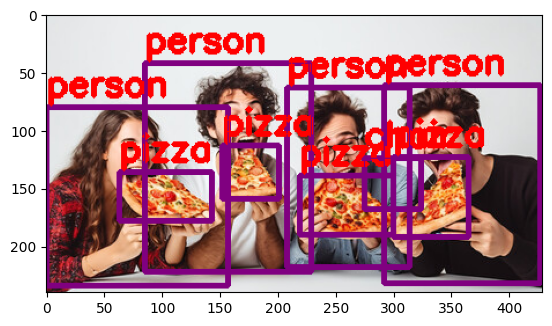

In [38]:
plt.imshow(img)
plt.show()